In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
TEST_DIR = "test"
TRAINING_DIR = "training"

## Loading dataset

In [3]:
training_labels_path = os.path.join(TRAINING_DIR, "labels.csv")
train_df = pd.read_csv(training_labels_path, index_col="ImageId")
train_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
2,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
3,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
4,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
5,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921
7046,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023
7047,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120


Total size of the training dataset is:

In [4]:
train_df.shape[0]

7049

Check if all images from labels are present:

In [5]:
all_exist = True
for i in range(1, 7049 + 1):
    if not os.path.exists(os.path.join(TRAINING_DIR, f"{i}.png")):
        all_exist = False
        print(f"Found missing image: {i}.png")
print("All images found!" if all_exist else "Some images not found!")

All images found!


Total size of test dataset is:

In [6]:
test_len = len(os.listdir(TEST_DIR))
test_len

1752

Image Size is 96x96, verifying for both test and training:

In [32]:
for file in os.listdir(TRAINING_DIR):
    if file.endswith(".png"):
        img_path = os.path.join(TRAINING_DIR, file)
        with Image.open(img_path) as img:
            width, height = img.size
            assert width == 96 and height == 96
print("Training images 96x96 size validated")

Training images 96x96 size validated


In [33]:
for file in os.listdir(TEST_DIR):
    if file.endswith(".png"):
        img_path = os.path.join(TRAINING_DIR, file)
        with Image.open(img_path) as img:
            width, height = img.size
            assert width == 96 and height == 96
print("Test images 96x96 size validated")

Test images 96x96 size validated


### Verifying that localization is interpreted correctly

Features availiable:

In [8]:
features = list(map(lambda x: x[:-2], train_df.columns[::2]))
"; ".join(features)

'left_eye_center; right_eye_center; left_eye_inner_corner; left_eye_outer_corner; right_eye_inner_corner; right_eye_outer_corner; left_eyebrow_inner_end; left_eyebrow_outer_end; right_eyebrow_inner_end; right_eyebrow_outer_end; nose_tip; mouth_left_corner; mouth_right_corner; mouth_center_top_lip; mouth_center_bottom_lip'

Taking the first training image data:

In [12]:
first_labels = train_df.iloc[0]
for i, pair in enumerate(zip(first_labels[0::2], first_labels[1::2])):
    print(features[i]," : ", pair)

left_eye_center  :  (66.0335639098, 39.0022736842)
right_eye_center  :  (30.2270075188, 36.4216781955)
left_eye_inner_corner  :  (59.582075188, 39.6474225564)
left_eye_outer_corner  :  (73.1303458647, 39.9699969925)
right_eye_inner_corner  :  (36.3565714286, 37.3894015038)
right_eye_outer_corner  :  (23.4528721805, 37.3894015038)
left_eyebrow_inner_end  :  (56.9532631579, 29.0336481203)
left_eyebrow_outer_end  :  (80.2271278195, 32.2281383459)
right_eyebrow_inner_end  :  (40.2276090226, 29.0023218045)
right_eyebrow_outer_end  :  (16.3563789474, 29.6474706767)
nose_tip  :  (44.4205714286, 57.0668030075)
mouth_left_corner  :  (61.1953082707, 79.9701654135)
mouth_right_corner  :  (28.6144962406, 77.3889924812)
mouth_center_top_lip  :  (43.3126015038, 72.9354586466)
mouth_center_bottom_lip  :  (43.1307067669, 84.4857744361)


In [13]:
from IPython.display import display
from PIL import ImageDraw
import random

In [14]:
def draw_cross(draw, x, y, color, size=5):
    draw.line((x - size, y, x + size, y), fill=color, width=1)
    draw.line((x, y - size, x, y + size), fill=color, width=1)

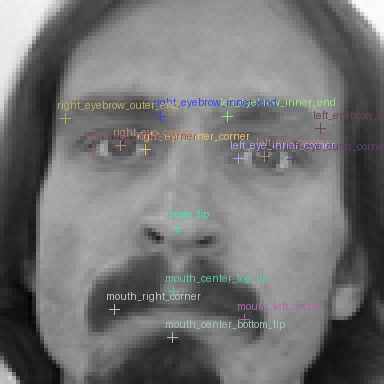

In [16]:
scale = 4
img = Image.open(os.path.join(TRAINING_DIR, "1.png")).convert("RGB")
w, h = img.size
scaled = img.resize((w * scale, h * scale), Image.NEAREST)
draw = ImageDraw.Draw(scaled)

for i, (x, y) in enumerate(zip(first_labels[0::2], first_labels[1::2])):
    color = tuple(random.randint(50, 255) for _ in range(3))
    sx, sy = x * scale, y * scale
    draw_cross(draw, sx, sy, color)
    text_x = sx - 2 * scale
    text_y = sy - 5 * scale
    draw.text((text_x, text_y), features[i], fill=color)

display(scaled)

Left and right here refers to the point of view of the subject.

# Data Cleaning

## Data Types

In [17]:
train_df.dtypes

left_eye_center_x            float64
left_eye_center_y            float64
right_eye_center_x           float64
right_eye_center_y           float64
left_eye_inner_corner_x      float64
left_eye_inner_corner_y      float64
left_eye_outer_corner_x      float64
left_eye_outer_corner_y      float64
right_eye_inner_corner_x     float64
right_eye_inner_corner_y     float64
right_eye_outer_corner_x     float64
right_eye_outer_corner_y     float64
left_eyebrow_inner_end_x     float64
left_eyebrow_inner_end_y     float64
left_eyebrow_outer_end_x     float64
left_eyebrow_outer_end_y     float64
right_eyebrow_inner_end_x    float64
right_eyebrow_inner_end_y    float64
right_eyebrow_outer_end_x    float64
right_eyebrow_outer_end_y    float64
nose_tip_x                   float64
nose_tip_y                   float64
mouth_left_corner_x          float64
mouth_left_corner_y          float64
mouth_right_corner_x         float64
mouth_right_corner_y         float64
mouth_center_top_lip_x       float64
m

All the data types are float, which is fine.

## Duplicates

Check if there are duplicates in images:

In [18]:
import hashlib
from collections import defaultdict

Iterating over images in TRAINING_DIR, computing hash and looking for the same hash:

In [19]:
hashes = defaultdict(list)
    
for filename in os.listdir(TRAINING_DIR):
    if filename.endswith(".png"):
        path = os.path.join(TRAINING_DIR, filename)
        with open(path, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
        hashes[file_hash].append(filename)

duplicates = [files for files in hashes.values() if len(files) > 1]
duplicates

[['1907.png', '1908.png'],
 ['2295.png', '4130.png'],
 ['2298.png', '6420.png'],
 ['2299.png', '4703.png'],
 ['2303.png', '6413.png'],
 ['2304.png', '3573.png'],
 ['2305.png', '4700.png'],
 ['2308.png', '7028.png'],
 ['2311.png', '2925.png'],
 ['2312.png', '7010.png'],
 ['2317.png', '7014.png'],
 ['2318.png', '5263.png'],
 ['2320.png', '4688.png'],
 ['2330.png', '4719.png'],
 ['2333.png', '5818.png'],
 ['2334.png', '2363.png'],
 ['2337.png', '5307.png'],
 ['2340.png', '4171.png'],
 ['2341.png', '4172.png'],
 ['2342.png', '5302.png'],
 ['2344.png', '2975.png'],
 ['2354.png', '6459.png'],
 ['2362.png', '6434.png'],
 ['2365.png', '4754.png'],
 ['2367.png', '6464.png'],
 ['2368.png', '2991.png'],
 ['2374.png', '3628.png'],
 ['2375.png', '3008.png'],
 ['2376.png', '5868.png'],
 ['2379.png', '3022.png'],
 ['2380.png', '3627.png'],
 ['2389.png', '2995.png'],
 ['2391.png', '2998.png'],
 ['2397.png', '4769.png'],
 ['2399.png', '5356.png'],
 ['2403.png', '6498.png'],
 ['2404.png', '4790.png'],
 

In [20]:
total_removed = 0
train_nodup_df = train_df
for dup in duplicates:
    orig = dup[0]
    same = dup[1:]
    same_ids = list(map(lambda x: int(x[:-4]), same))
    train_nodup_df = train_nodup_df.drop(same_ids)
    total_removed += len(same)
print("Total number of removed images: ", total_removed)

Total number of removed images:  555


In [21]:
train_nodup_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
2,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
3,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
4,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
5,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,63.352951,35.671311,33.952078,40.816448,NaN,NaN,NaN,NaN,NaN,NaN,...,48.162462,59.681992,NaN,NaN,NaN,NaN,NaN,NaN,50.367575,70.952324
7043,67.929319,35.846552,28.687820,41.452484,NaN,NaN,NaN,NaN,NaN,NaN,...,50.844585,69.749069,NaN,NaN,NaN,NaN,NaN,NaN,52.446275,81.227824
7044,66.867222,37.356855,30.750926,40.115743,NaN,NaN,NaN,NaN,NaN,NaN,...,43.542112,64.945694,NaN,NaN,NaN,NaN,NaN,NaN,47.555045,79.492551


Image files of the duplicates are kept as further processing will be done based on dataframe, not files in directory.

Iterating over images in TEST_DIR, computing hash and looking for the same hash:

In [22]:
hashes = defaultdict(list)
    
for filename in os.listdir(TEST_DIR):
    if filename.endswith(".png"):
        path = os.path.join(TEST_DIR, filename)
        with open(path, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
        hashes[file_hash].append(filename)

duplicates = [files for files in hashes.values() if len(files) > 1]
duplicates

[]

As images themselves is all we have for the analysis, we remove the duplicates images:

In [23]:
for dup in duplicates:
    same = dup[1:]
    for file in same:
        file_path = os.path.join(TEST_DIR, file)
        if os.path.exists(file_path):
            os.remove(file_path)
            total_removed += 1
print("Total number of removed images: ", total_removed)

Total number of removed images:  555


Now, let's look into the dataset, if there are some duplicates value for the different images:

In [24]:
np.any(train_nodup_df.duplicated())

np.False_

There are no duplicates in data left after removing duplicate images.

## Missing Values

In [25]:
train_nodup_df.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4224
left_eye_inner_corner_y      4224
left_eye_outer_corner_x      4228
left_eye_outer_corner_y      4228
right_eye_inner_corner_x     4227
right_eye_inner_corner_y     4227
right_eye_outer_corner_x     4226
right_eye_outer_corner_y     4226
left_eyebrow_inner_end_x     4225
left_eyebrow_inner_end_y     4225
left_eyebrow_outer_end_x     4270
left_eyebrow_outer_end_y     4270
right_eyebrow_inner_end_x    4225
right_eyebrow_inner_end_y    4225
right_eyebrow_outer_end_x    4258
right_eyebrow_outer_end_y    4258
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4226
mouth_left_corner_y          4226
mouth_right_corner_x         4225
mouth_right_corner_y         4225
mouth_center_top_lip_x       4220
mouth_center_top_lip_y       4220
mouth_center_bottom_lip_x      33
mouth_center_b

Total number of images with no data missing:

In [26]:
df_full = train_nodup_df.dropna()
df_full

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
2,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
3,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
4,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
5,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,45.805390,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618
2279,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,53.649433,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156
2282,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,53.318891,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522


In [28]:
missing_pct = train_nodup_df.isna().mean() * 100
missing_pct

left_eye_center_x             0.153988
left_eye_center_y             0.153988
right_eye_center_x            0.200185
right_eye_center_y            0.200185
left_eye_inner_corner_x      65.044657
left_eye_inner_corner_y      65.044657
left_eye_outer_corner_x      65.106252
left_eye_outer_corner_y      65.106252
right_eye_inner_corner_x     65.090853
right_eye_inner_corner_y     65.090853
right_eye_outer_corner_x     65.075454
right_eye_outer_corner_y     65.075454
left_eyebrow_inner_end_x     65.060055
left_eyebrow_inner_end_y     65.060055
left_eyebrow_outer_end_x     65.753003
left_eyebrow_outer_end_y     65.753003
right_eyebrow_inner_end_x    65.060055
right_eyebrow_inner_end_y    65.060055
right_eyebrow_outer_end_x    65.568217
right_eyebrow_outer_end_y    65.568217
nose_tip_x                    0.000000
nose_tip_y                    0.000000
mouth_left_corner_x          65.075454
mouth_left_corner_y          65.075454
mouth_right_corner_x         65.060055
mouth_right_corner_y     

In [29]:
missing_eyes = [
    'left_eye_inner_corner_x', 
    'left_eye_inner_corner_y', 
    'left_eye_outer_corner_x', 
    'left_eye_outer_corner_y',
    'right_eye_inner_corner_x',
    'right_eye_inner_corner_y',
    'right_eye_outer_corner_x',
    'right_eye_outer_corner_y',
]
df_missing_eyes = train_nodup_df[train_nodup_df[missing_eyes].isna().any(axis=1)]
df_missing_eyes

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1621,40.458999,40.761635,NaN,NaN,35.552085,39.437385,46.618306,42.578631,NaN,NaN,...,19.534175,55.672760,NaN,NaN,NaN,NaN,29.324415,66.698519,29.324415,72.600096
1644,63.102046,40.587124,NaN,NaN,54.666559,40.177803,71.295616,40.886204,NaN,NaN,...,36.440816,64.122929,61.314974,75.798050,29.673104,74.023968,44.624113,77.933528,45.114863,79.831186
1653,43.312994,39.441219,20.132056,39.410208,38.696963,39.654267,49.344689,39.828861,NaN,NaN,...,19.219701,57.654087,42.073749,70.457936,19.297439,67.656085,26.056623,71.419578,25.943341,72.577576
1655,66.983855,37.191636,30.778167,27.431834,NaN,NaN,76.579801,40.116137,38.34946,30.472663,...,47.356172,54.676425,60.910345,70.723153,18.179873,60.403659,41.001999,67.490500,38.801970,73.222801
1686,65.153204,39.850963,30.073522,40.311816,NaN,NaN,72.418622,40.836359,NaN,NaN,...,48.408086,59.520387,66.747711,81.967816,32.127888,84.451582,50.412462,81.977636,49.874749,83.356986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,63.352951,35.671311,33.952078,40.816448,NaN,NaN,NaN,NaN,NaN,NaN,...,48.162462,59.681992,NaN,NaN,NaN,NaN,NaN,NaN,50.367575,70.952324
7043,67.929319,35.846552,28.687820,41.452484,NaN,NaN,NaN,NaN,NaN,NaN,...,50.844585,69.749069,NaN,NaN,NaN,NaN,NaN,NaN,52.446275,81.227824
7044,66.867222,37.356855,30.750926,40.115743,NaN,NaN,NaN,NaN,NaN,NaN,...,43.542112,64.945694,NaN,NaN,NaN,NaN,NaN,NaN,47.555045,79.492551


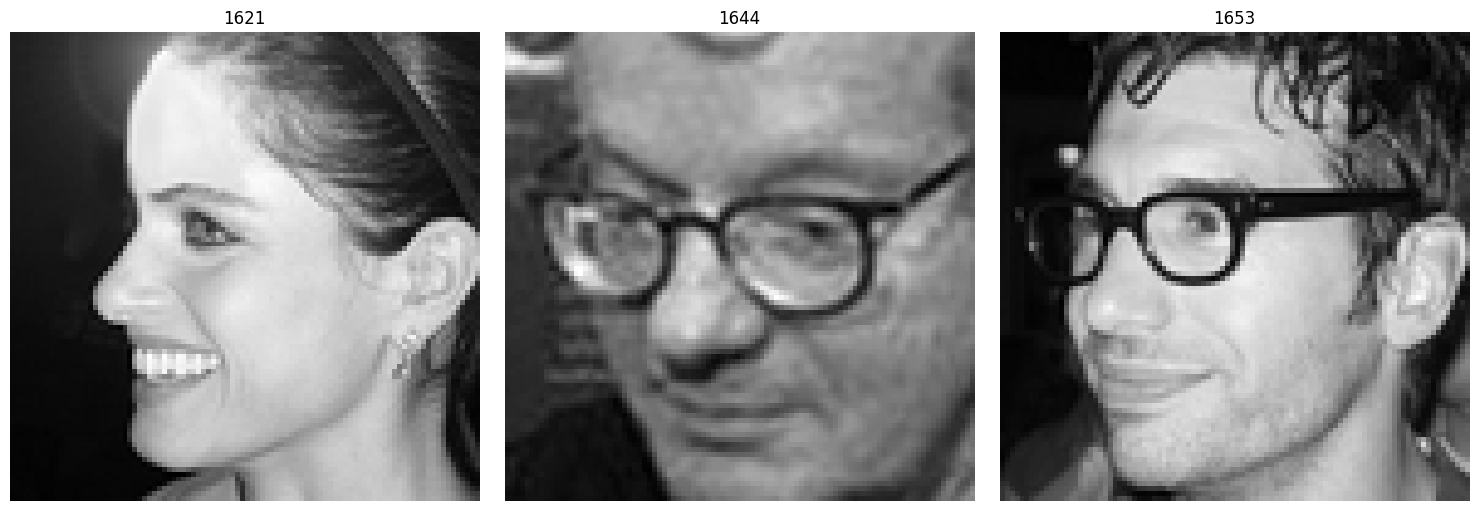

In [32]:
image_ids = df_missing_eyes.index[:3]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, img_id in zip(axes, image_ids):
    img_path = f"{TRAINING_DIR}/{img_id}.png"
    img = Image.open(img_path).convert('L')
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(img_id)

plt.tight_layout()
plt.show()

In [33]:
missing_mouth = [
    'mouth_left_corner_x',
    'mouth_left_corner_y',
    'mouth_right_corner_x',
    'mouth_right_corner_y',
    'mouth_center_top_lip_x',
    'mouth_center_top_lip_y',
]
df_missing_mouth = train_nodup_df[train_nodup_df[missing_mouth].isna().any(axis=1)]
df_missing_mouth

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1621,40.458999,40.761635,NaN,NaN,35.552085,39.437385,46.618306,42.578631,NaN,NaN,...,19.534175,55.672760,NaN,NaN,NaN,NaN,29.324415,66.698519,29.324415,72.600096
1725,68.202647,34.199777,26.483018,39.770241,61.393445,36.617440,77.810266,32.665826,35.127174,39.375337,...,54.203092,69.458009,67.78458,81.307937,37.514698,86.559143,NaN,NaN,NaN,NaN
1732,68.557396,43.293641,24.645775,35.182189,60.659403,45.123292,84.658323,45.397740,37.544814,40.244223,...,33.374127,79.750110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1738,65.930159,40.315344,33.499471,33.760847,59.697354,40.174603,73.128042,44.356614,40.154497,35.831746,...,43.720333,57.682540,NaN,NaN,NaN,NaN,42.744671,74.489796,42.572940,75.195767
1748,75.007892,33.742815,8.472983,40.022514,61.682968,40.396306,91.515526,35.143287,23.025937,44.258819,...,47.351880,87.587970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,63.352951,35.671311,33.952078,40.816448,NaN,NaN,NaN,NaN,NaN,NaN,...,48.162462,59.681992,NaN,NaN,NaN,NaN,NaN,NaN,50.367575,70.952324
7043,67.929319,35.846552,28.687820,41.452484,NaN,NaN,NaN,NaN,NaN,NaN,...,50.844585,69.749069,NaN,NaN,NaN,NaN,NaN,NaN,52.446275,81.227824
7044,66.867222,37.356855,30.750926,40.115743,NaN,NaN,NaN,NaN,NaN,NaN,...,43.542112,64.945694,NaN,NaN,NaN,NaN,NaN,NaN,47.555045,79.492551


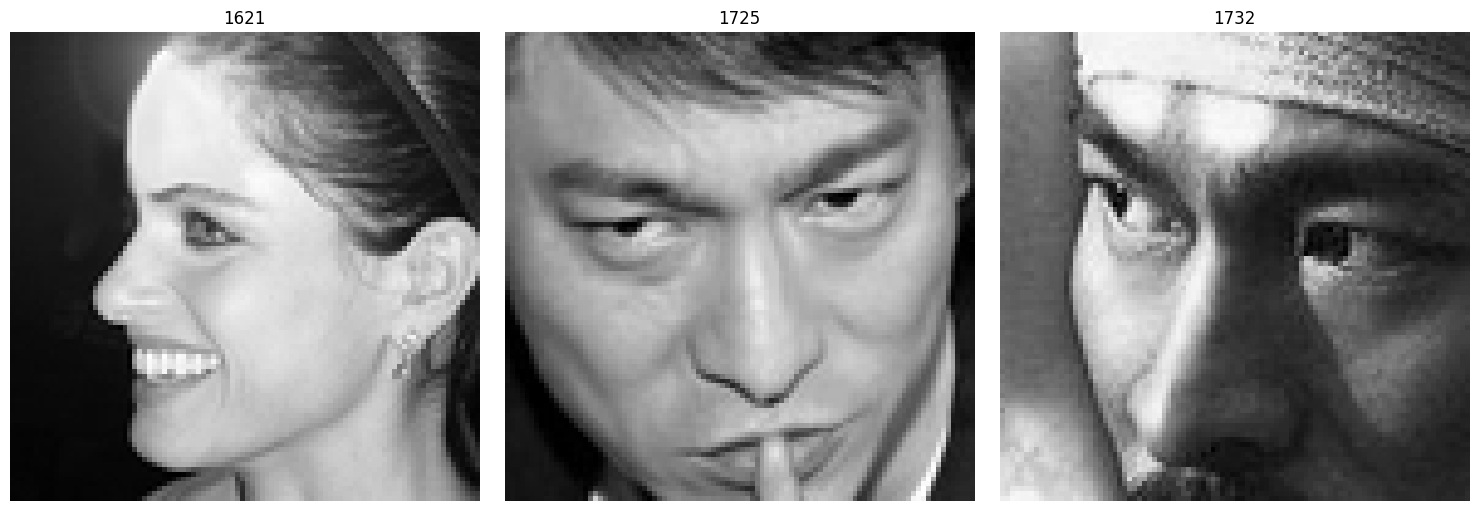

In [34]:
image_ids = df_missing_mouth.index[:3]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, img_id in zip(axes, image_ids):
    img_path = f"{TRAINING_DIR}/{img_id}.png"
    img = Image.open(img_path).convert('L')
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(img_id)

plt.tight_layout()
plt.show()

## Augmentation

In [37]:
df_full.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [44]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import albumentations as A

aug_folder = "augmented/"
os.makedirs(aug_folder, exist_ok=True)

keypoint_cols = [
    'left_eye_center', 'right_eye_center',
    'left_eye_inner_corner', 'left_eye_outer_corner',
    'right_eye_inner_corner', 'right_eye_outer_corner',
    'left_eyebrow_inner_end', 'left_eyebrow_outer_end',
    'right_eyebrow_inner_end', 'right_eyebrow_outer_end',
    'nose_tip',
    'mouth_left_corner', 'mouth_right_corner',
    'mouth_center_top_lip', 'mouth_center_bottom_lip'
]

def extract_keypoints(row):
    kpts = []
    for feat in keypoint_cols:
        x = row[f"{feat}_x"]
        y = row[f"{feat}_y"]
        kpts.append([x, y])
    return kpts

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=0, p=0.5)
], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))

aug_rows = []

for img_id, row in df_full.iterrows():
    img_path = os.path.join(TRAINING_DIR, f"{img_id}.png")
    image = np.array(Image.open(img_path).convert('RGB'))

    keypoints = extract_keypoints(row)

    augmented = transform(image=image, keypoints=keypoints)
    img_aug = Image.fromarray(augmented['image'])
    kpts_aug = augmented['keypoints']

    new_img_name = f"aug_{img_id}.png"
    save_path = os.path.join(aug_folder, new_img_name)
    img_aug.save(save_path)

    kpt_dict = {}
    for feat, (x, y) in zip(keypoint_cols, kpts_aug):
        kpt_dict[f"{feat}_x"] = x
        kpt_dict[f"{feat}_y"] = y
    kpt_dict['ImageId'] = new_img_name[:-4]
    aug_rows.append(kpt_dict)

df_aug = pd.DataFrame(aug_rows)
df_aug.set_index('ImageId', inplace=True)
df_aug

C:\Users\nidob\Desktop\fiit-stuff\ZS 2025-2026\ZNEUS\ZNEUS-25-FacialKeypoints\venv\Lib\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
aug_1,27.116030,47.944935,58.204491,29.992870,33.202011,45.709164,21.153524,51.913490,53.112190,33.539211,...,54.446655,54.762962,49.352325,82.691513,77.538353,66.147026,62.370491,68.556236,67.576096,78.868591
aug_2,35.999969,29.947329,68.811317,40.338005,41.038403,32.115692,29.581196,28.893774,62.782928,39.103333,...,44.031433,54.920830,29.204380,71.527069,49.310131,78.562805,40.439743,69.159492,36.352631,83.864243
aug_3,32.214565,37.558609,63.894176,37.558609,37.450760,38.897190,26.716505,38.897190,57.610516,38.897190,...,48.446884,55.227673,36.142002,73.699188,61.276085,73.431427,48.708752,71.022141,48.708752,79.053268
aug_4,29.002642,37.178223,63.650639,37.178223,34.452377,38.876652,21.605076,38.197235,57.811504,38.536983,...,42.924034,52.569798,28.613253,69.447670,58.200897,70.805901,44.574810,67.069450,43.262028,74.514221
aug_5,28.274696,39.621262,62.755192,38.042030,36.434109,39.621262,22.484070,39.884468,58.017620,39.094852,...,51.700466,64.889519,34.328590,77.523239,63.808243,76.997299,50.037251,73.707390,50.772858,86.871162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aug_2278,27.516743,36.342312,61.421516,34.548244,35.377808,37.318748,22.065125,37.768589,55.303520,36.379116,...,49.527191,60.016045,31.291059,73.687378,60.252380,73.685822,47.067657,76.782600,47.231865,77.353218
aug_2279,29.275513,36.301022,69.622452,37.311226,36.469387,37.739796,20.551018,37.525509,61.448978,38.107143,...,41.350567,62.472790,28.071877,79.229050,66.984619,81.151718,46.228024,81.816772,45.712730,82.871155
aug_2282,64.289040,29.646105,22.972160,41.414146,57.746304,33.327316,72.220573,28.929377,32.544041,40.074593,...,56.715698,59.784050,77.492897,69.290375,28.891964,84.362167,57.599224,77.262016,58.970417,88.668030


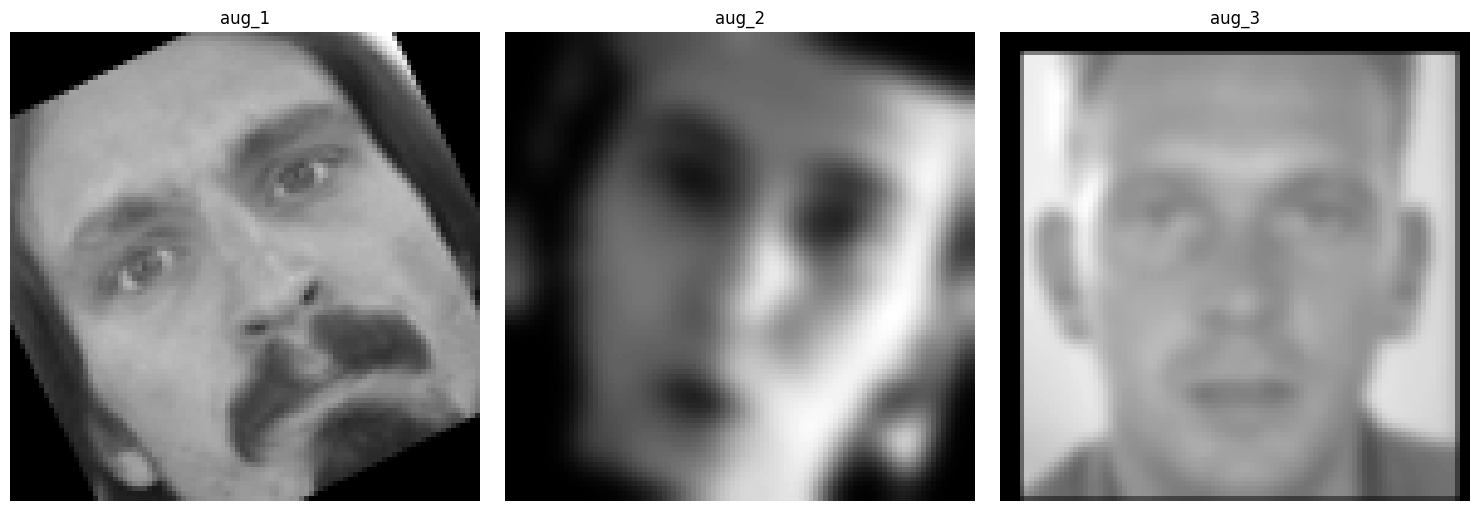

In [45]:
image_ids = df_aug.index[:3]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, img_id in zip(axes, image_ids):
    img_path = f"augmented/{img_id}.png"
    img = Image.open(img_path).convert('L')
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(img_id)

plt.tight_layout()
plt.show()